In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('../data/train.tsv', sep='\t')
test = pd.read_csv('../data/test.tsv', sep='\t')

print train.shape
print train.head()

(156060, 4)


/home/isaac/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


##  What percent of reviews fall into each category?

In [143]:
sentiment_counts = train.groupby('Sentiment').size()
sentiment_percents = 100 * sentiment_counts / len(train)

sentiment_labels = ['Negative', 'Somewhat Negative', 'Neutral', 'Somewhat Positive', 'Positive']

print "Percent of phrases in each category:"
print "------------------------------------"
for (index, sentiment) in enumerate(sentiment_labels):
    print "%-20s%5.2f%%" % (sentiment, sentiment_percents[index])

Percent of phrases in each category:
------------------------------------
Negative             4.53%
Somewhat Negative   17.48%
Neutral             50.99%
Somewhat Positive   21.10%
Positive             5.90%


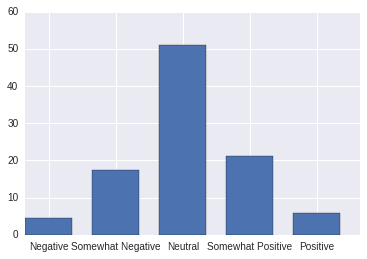

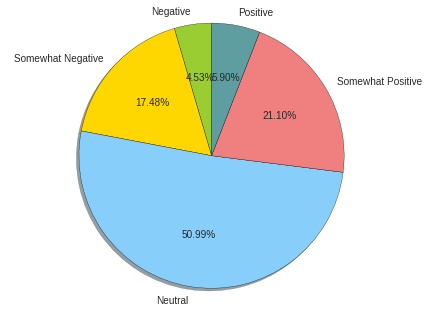

In [144]:
inds = range(len(sentiment_percents))
barwidth = 0.7

ticks_locs = map(lambda x: x + barwidth/2, inds)

plt.bar(inds, sentiment_percents, width=barwidth)
plt.xticks(ticks_locs, sentiment_labels)
plt.show()

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'cadetblue']
plt.pie(sentiment_percents, colors=colors, labels=sentiment_labels, shadow=True, startangle=90, autopct="%.2f%%")
plt.axis('equal')
plt.tight_layout()
plt.show()

## What's the variation in sentiments within a sentence?

In [145]:
grouped = train.groupby('SentenceId')
print 'Average Sentiment Variance: %f' % grouped.Sentiment.var().mean()

Average Sentiment Variance: 0.523364


## Which words are most significant to each sentiment?

In [146]:
# Count the occurrences of each word in each phrase
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(train.Phrase)

In [147]:
# Add the word frequencies to the training data frame
words = pd.DataFrame(columns=vectorizer.get_feature_names(), data=X.toarray())
train_words = pd.concat([train, words], axis=1, copy=False)
grouped = train_words.groupby('Sentiment').sum()
grouped.drop(['PhraseId', 'SentenceId'], inplace=True, axis=1)

In [148]:
sentiments_t = grouped.transpose()

from sets import Set

common_sentiment_words = {}
for sentiment in range(5):
    words = sentiments_t[sentiment].sort_values(ascending=False)
    top_words = words[:100].index.values
    common_sentiment_words[sentiment] = top_words
    
sentiment_words = {}
for i in common_sentiment_words:
    common_words = Set()
    for j in common_sentiment_words:
        if i != j:
            common_words |= Set(common_sentiment_words[j])
    sentiment_words[i] = Set(common_sentiment_words[i]) - common_words
    
for i in sentiment_words:
    print "%s:\n" % sentiment_labels[i]
    for word in sentiment_words[i]:
        print word
    print ""

Negative:

money
cheap
head
simply
pointless
poorly
tedious
fails
unfunny
ll
goes
waste
direction
worse
mess
sequel
sloppy
hours
completely
nearly
imagine
awful
minute
theater
plain
terrible
ugly
stupid
loud

Somewhat Negative:

slow
gags
tired
tv
lack
idea
quite
cliches
wrong
short
premise
bland
cold
trying
lacks
bit

Neutral:

think
kids
war
familiar
political
young
times
dark
women
book
lives
john
come
day
say
subject

Somewhat Positive:

enjoy
intriguing
power
laughs
honest
high
charm
pretty
portrait
comic
strong
spirit

Positive:

inventive
remarkable
intelligence
surprisingly
beautifully
fine
perfect
satisfying
entertainment
terrific
written
wonderful
rich
gorgeous
intelligent
visually
oscar
hilarious
cinematic
charming
touching
excellent
impressive
brilliant
experience
solid
delightful
masterpiece
piece

